# Test Nino34 Calculation

In [1]:
import sys
sys.path.append('../')
import helpers.fileHandler as fh
import helpers.cvdpTime as cvdpTime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import cftime
import utils.sstIndex as sst

First load up the cvdp and figure out the details of the index we want to calculate

In [2]:
cvdp = fh.loadModelData('CESM-LME', 'cvdp_data', '005', decode_times=False)

ninoCvdp = cvdp.nino34
del cvdp
ninoCvdp = cvdpTime.decodeTime(ninoCvdp)
ninoCvdp.comment_cvdp

Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/cesm1.lm.cvdp_data/b.e11.BLMTRC5CN.f19_g16.005.cvdp_data.850-2005.nc']


'area average domain (-5:5N, 190:240E)'

Next load the model outputs, but drop all the variables we don't care about

In [3]:
ds = fh.loadModelData('CESM-LME', 'SST', '005',drop_variables=('ANGLE','ANGLET', 'DXT', 'DXU', 'DYT', 'DYU', 'HT', 'HTE', 'HTN',
              'HU', 'HUS', 'HUW', 'KMT', 'KMU', 'REGION_MASK', 'T0_Kelvin',
              'UAREA', 'cp_air', 'cp_sw', 'days_in_norm_year', 'dz', 'dzw', 'fwflux_factor', 
              'grav', 'heat_to_PW', 'hflux_factor', 'latent_heat_fusion', 'latent_heat_vapor',
              'mass_to_Sv', 'moc_components', 'momentum_factor','nsurface_t', 'nsurface_u', 
              'ocn_ref_salinity', 'omega', 'ppt_to_salt', 'radius', 'rho_air', 'rho_fw', 'rho_sw',
              'salinity_factor', 'salt_to_Svppt', 'salt_to_mmday', 'salt_to_ppt', 'sea_ice_salinity',
              'sflux_factor', 'sound', 'stefan_boltzmann', 'transport_components', 'transport_regions',
              'vonkar','z_t_150m', 'z_w', 'z_w_bot', 'z_w_top', 'moc_z', 'lat_aux_grid', 'time_bound','z_t', 'ULAT', 'ULONG') )

Files imported: 
 ['/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.170001-179912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.120001-129912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.090001-099912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.130001-139912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.185001-200512.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.160001-169912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.110001-119912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.180001-184912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.140001-149912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.085001-089912.nc', '

In [4]:
nino34 = sst.calculateIndex(ds, 'nino34')

/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]


Sanity check that the areas selected look believable

In [5]:
nino34.isel(time=0).SST

<xarray.DataArray 'SST' (nlat: 38, nlon: 45)>
dask.array<getitem, shape=(38, 45), dtype=float32, chunksize=(38, 45), chunktype=numpy.ndarray>
Coordinates:
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(38, 45), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(38, 45), meta=np.ndarray>
    time     object 0850-02-01 00:00:00
    month    int64 2
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean

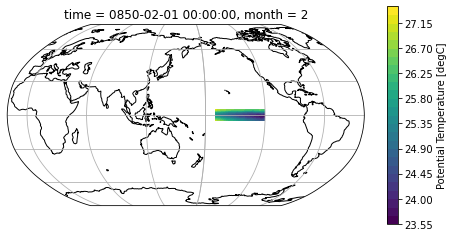

In [6]:
nino34Slice = nino34.isel(time=0) # select a slice

# -- plot the 'quick' way
plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=160))  # set up projection
ax.set_global()

#sst2d.SST.plot.pcolormesh()

nino34Slice.SST.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='TLONG', y='TLAT', center=False, levels=35)


ax.coastlines()
ax.gridlines()
plt.show()

Calculate nino34

In [7]:
#Load that into memory to speed up accessing it multiple times
nino34.nino34.load()

<xarray.DataArray 'nino34' (time: 13872)>
array([-0.26150261, -0.02548302,  0.1622865 , ..., -0.61297338,
       -0.68380224, -0.47953208])
Coordinates:
  * time     (time) object 0850-02-01 00:00:00 ... 2006-01-01 00:00:00
    month    (time) int64 2 3 4 5 6 7 8 9 10 11 12 ... 3 4 5 6 7 8 9 10 11 12 1

(calculatedDmi-iodCvdp).plot()

Do a comparison plot. Between calculated index and cvdp

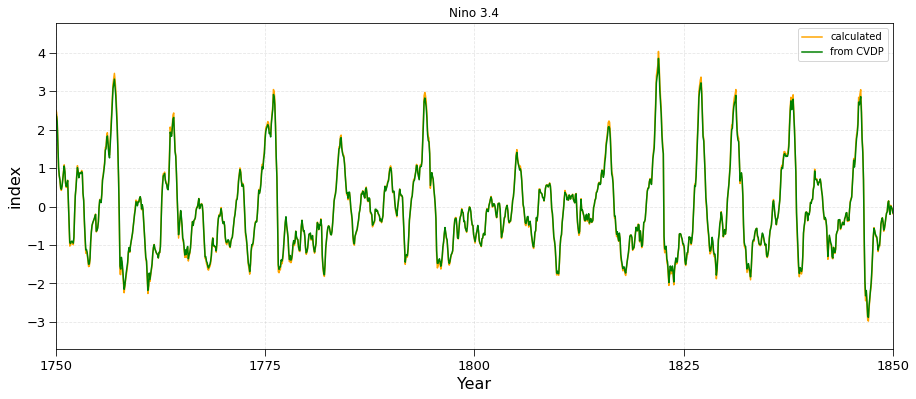

In [8]:
# Plot
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

#domainAv.plot(color='red',label='based on cosine Lat')
nino34.nino34.plot(color='orange',label='calculated')
ninoCvdp.plot(color='green' ,label='from CVDP')

plt.xlim(cftime.DatetimeNoLeap(1750,1,1), cftime.DatetimeNoLeap(1850,1,1))

plt.title("Nino 3.4")
plt.ylabel("index", fontsize=16)  
plt.xlabel("Year", fontsize=16)

plt.tick_params(which = 'minor', labelsize=13, length=4)
plt.tick_params(which = 'major', labelsize=13, length=7)
ax.grid(which='major', alpha=0.3, linestyle='dashed')

plt.legend()

plt.show()

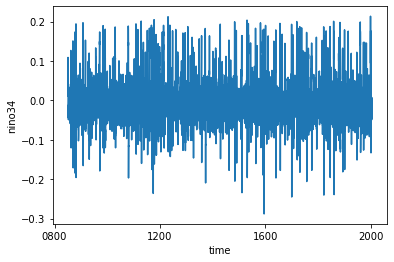

In [9]:
(nino34.nino34-ninoCvdp).plot()

In [10]:
(ninoCvdp-nino34.nino34).std().values

array(0.05407238)